<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_05/TG5_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1

### Langkah 1 - Persiapan Lingkungan

In [35]:
# instalasi library hdbscan (karena tidak tersedia default pada sklearn)
!pip install hdbscan

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

### Langkah 2 - Definisi Fungsi Visualisasi

In [ ]:
# fungsi untuk memplot hasil clustering
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
  # jika axis (ax) belum ada
  if ax is None:
    # buat subplot baru dengan ukuran 10, 4
    _, ax = plt.subplots(figsize=(10, 4))

  # jika label kosong, isi semua nilai dengan angka 1 (biar nggak error)
  labels = labels if labels is not None else np.ones(X.shape[0])

  # jika probabilitas kosong, isi semua nilai dengan angka 1
  probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])

  # ambil semua label set unik
  unique_labels = set(labels)

  # buat warna yang berbeda di setiap clusternya
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

  # map index titik ke probabilitasnya
  proba_map = {idx: probabilities[idx] for idx in range(len(labels))}

  # loop untuk tiap cluster
  for k, col in zip(unique_labels, colors):
    # jika label (k) bernilai -1, anggap noise (dengan memberikan warna hitam)
    if k == -1:
      # kode warna hitam
      col = [0, 0, 0, 1]

    # ambil index data yang masuk ke cluster k
    class_index = (labels == k).nonzero()[0]

    # loop tiap titik dalam cluster
    for ci in class_index:
      ax.plot(
          # koordinat X
          X[ci, 0],
          # koordinat Y
          X[ci, 1],
          # jika noise (karena bernilai -1), maka kasih tanda "x". Sedangkan, jika cluster kasih tanda "o"
          "x" if k == -1 else "o",
          # warna isi marker
          markerfacecolor=tuple(col),
          # warna pinggir hitam
          markeredgecolor="k",
          # jika noise kasih ukuran 4, jika cluster kasih ukuran sesuai probabilitas
          markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
      )

    # hitung jumlah cluster (kecuali noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # pemberian judul "True" untuk data asli, "Estimated" untuk hasil cluster
    preamble = "True" if ground_truth else "Estimated"

    # buat judul plot sesuai dengan banyaknya jumlah cluster
    title = f"{preamble} number of clusters: {n_clusters}"

    # kalau ada parameter kosong, beri judul juga
    if parameters is not None:
      parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
      title += f" | {parameters_str}"

    # set judul di plot
    ax.set_title(title)

    # agar layout rapi
    plt.tight_layout()

### Langkah 3 - Membuat Dataset Sintetis

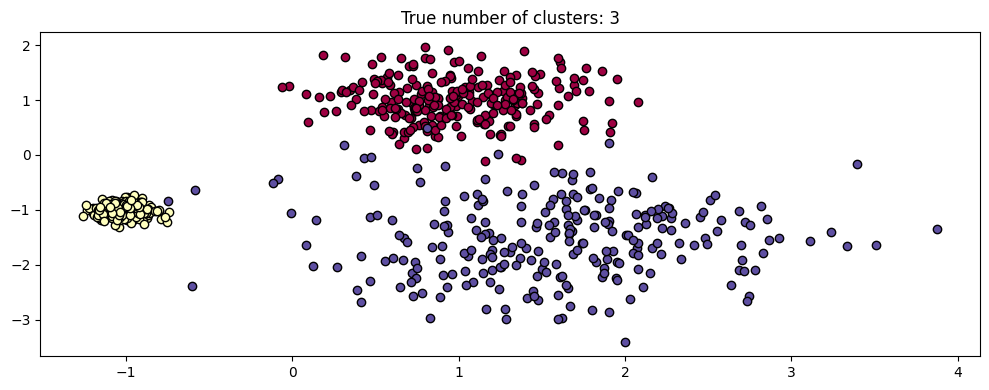

In [ ]:
# membuat data sampel untuk clustering, dengan memberikan 3 titik pusat (centroid) untuk tiap cluster
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    # jumlah total sample data sebanyak 750
    n_samples=750,
    # pusat cluster di tengah
    centers=centers,
    # besar sebaran data (standar deviasi)
    cluster_std=[0.4, 0.1, 0.75],
    # seed selalu sama
    random_state=0
)

# menampilkan data hasil make_blobs dalam bentuk scatter plot
# dengan memberikan warna berbeda sesuai cluster asli
plot(X, labels=labels_true, ground_truth=True)

### Langkah 4 - Uji Scale Invariance pada DBSCAN

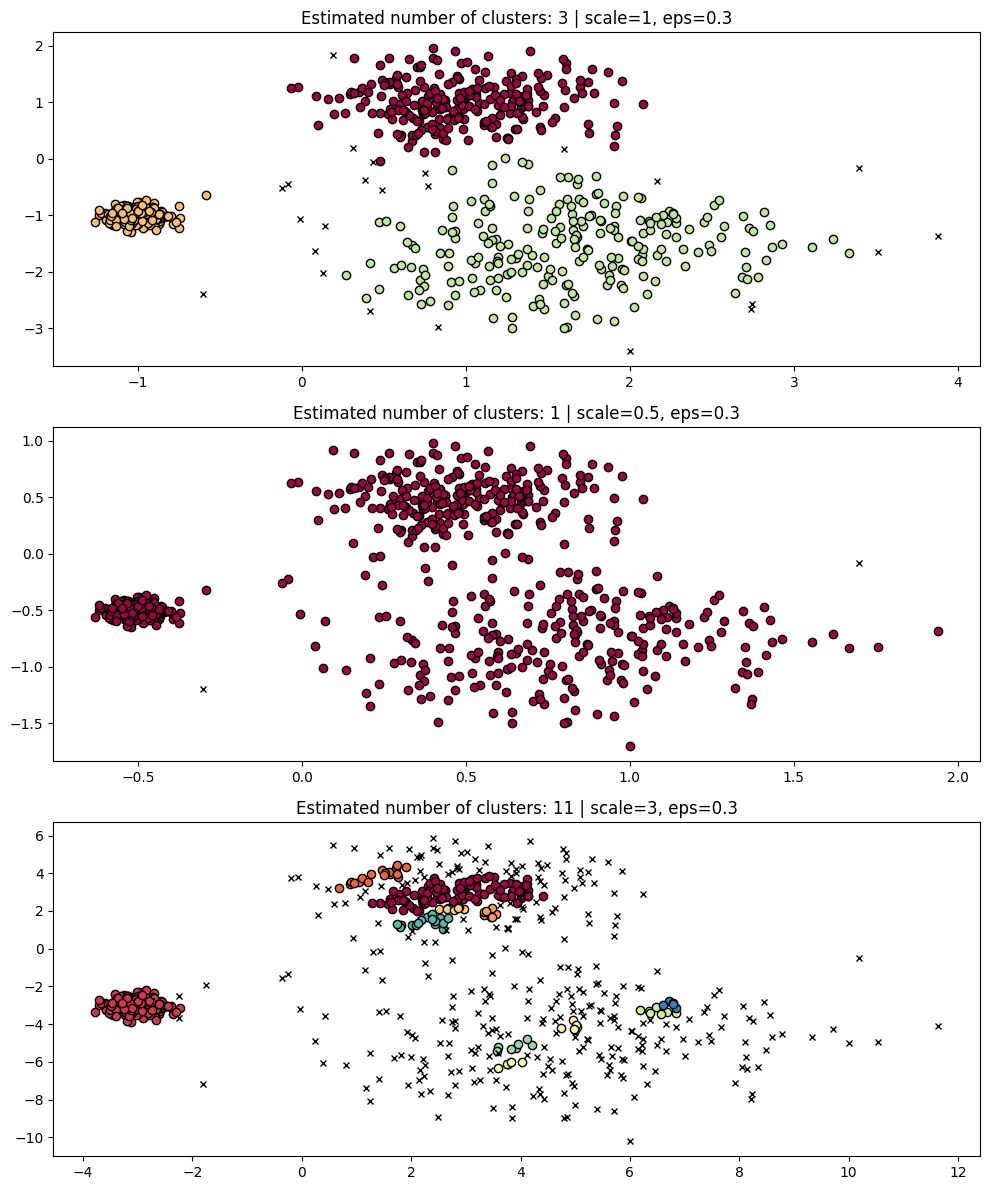

In [ ]:
# membuat 3 subplot (3 baris, 1 kolom) dengan ukuran 10x12 inci
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# membuat objek DBSCAN dengan parameter eps (jarak maksimum antar titik) = 0.3
dbs = DBSCAN(eps=0.3)

# membuat perulangan sebanyak 3 nilai pada skala yang berbeda
for idx, scale in enumerate([1, 0.5, 3]):
  # mengalikan data X dengan skala (bisa tambah besar atau kecil)
  dbs.fit(X * scale)

  # menampilkan hasil clustering sesuai indeks
  plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

Perbandingan dengan mengubah eps sesuai skala

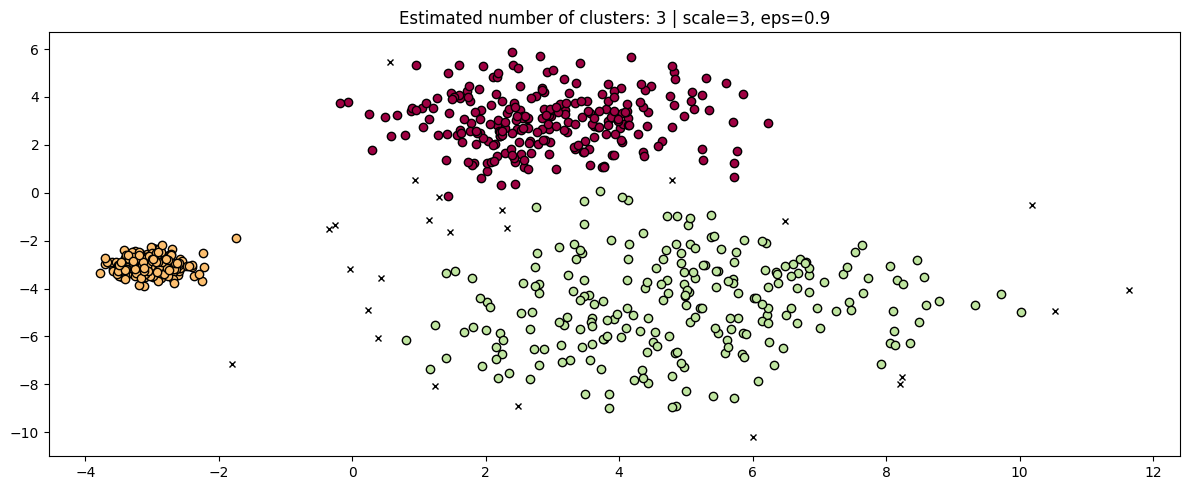

In [ ]:
# membuat 1 subplot dengan ukuran 12x5 inci
fig, axis = plt.subplots(1, 1, figsize=(12, 5))

# membuat objek DBSCAN dengan eps (jarak maksimum antar titik) = 0.9, kemudian diperbesar 3 kali
dbs = DBSCAN(eps=0.9).fit(3 * X)

# menampilkan hasil clustering
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps":0.9}, ax=axis)

### Langkah 5 - Bandingkan dengan HDBSCAN (lebih robust)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

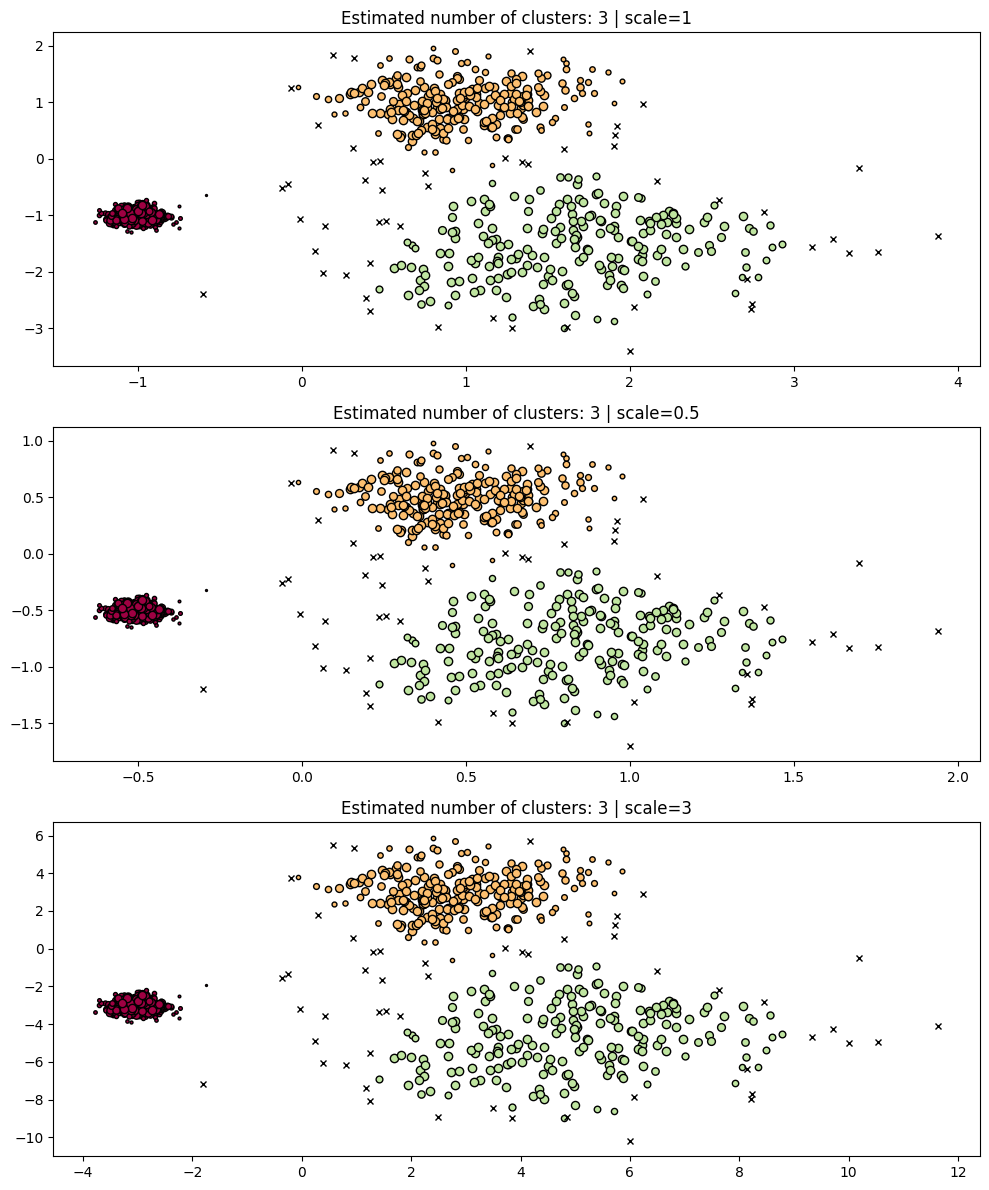

In [ ]:
# membuat subplot sebanyak 3 baris, 1 kolom dengan ukuran 10x12 inci
fig, axes = plt.subplots(3, 1,figsize=(10, 12))

# menginisialisasi algoritma HDBSCAN (lebih robust daripada DBSCAN)
hdb = hdbscan.HDBSCAN()

# melakukan perulangan pada data dengan tiga skala yang berbeda
for idx, scale in enumerate([1, 0.5, 3]):
  # melatih model HDBSCAN pada data yang telah diskalakan
  hdb.fit(X * scale)

  # menampilkan hasil clustering dan proba
  plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

### Langkah 6: Multi-Scale Clustering

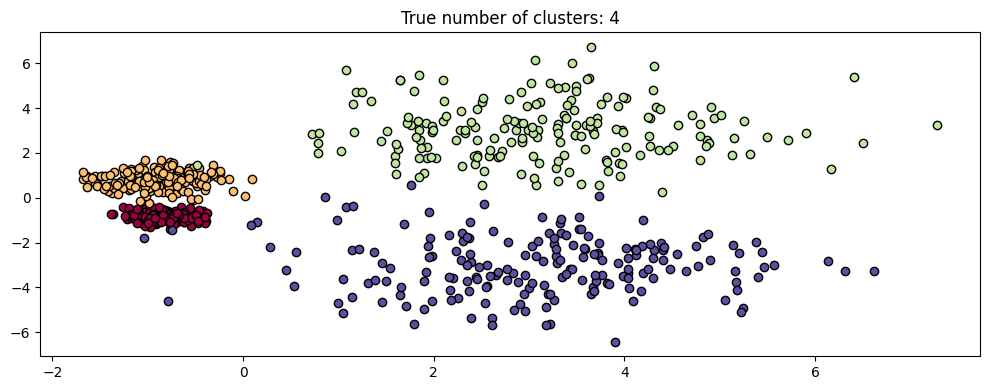

In [ ]:
# menentukan posisi pusat cluster dengan jarak dan koordinat yang berbeda
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]

# membuat dataset dengan 750 titik dengan 4 cluster berbeda menggunakan make_blobs
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)

# menampilkan plot data beserta label aslinya
plot(X, labels=labels_true, ground_truth=True)

Membandingkan DBSCAN dengan eps berbeda

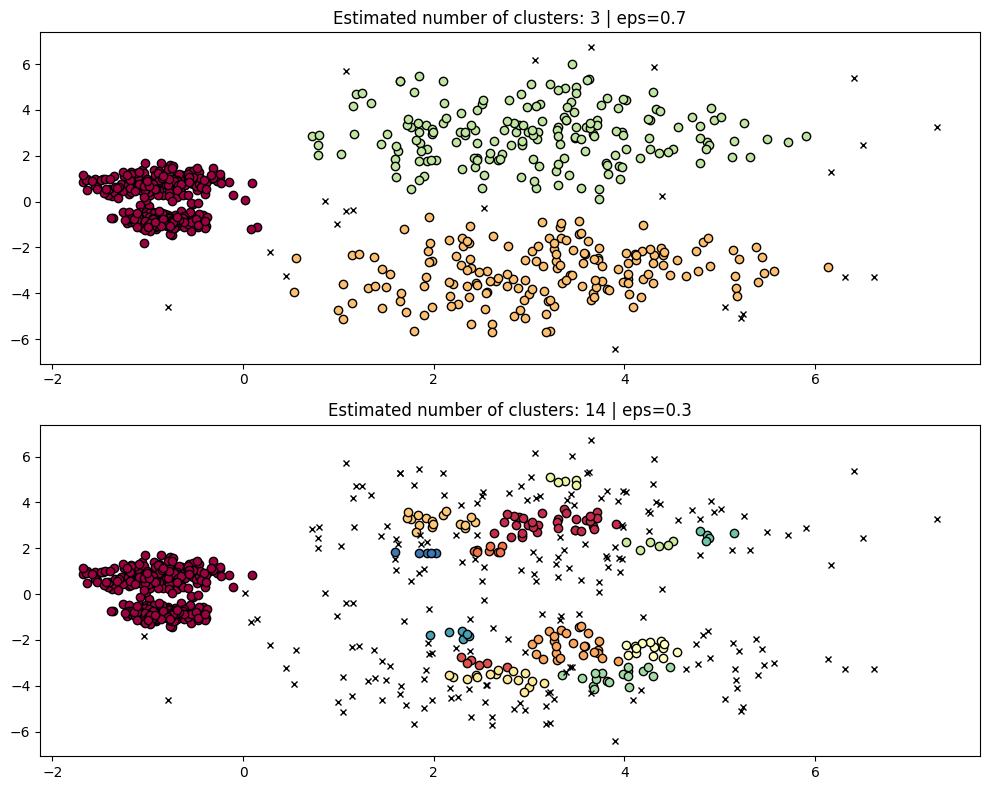

In [ ]:
# membuat subplot sebanyak 2 baris, 1 kolom dengan ukuran 10x8 inci
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# menjalankan DBSCAN dengan eps = 0.7, kemudian tampilkan hasil clustering pada subplot pertama
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])

# menjalankan DBSCAN dengan eps = 0.3, kemudian tampilkan hasil clustering pada subplot kedua
params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

Menjalankan HDBSCAN

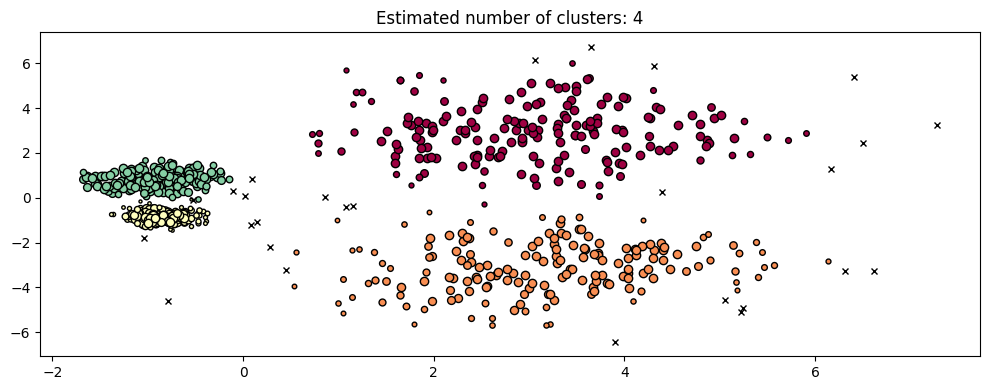

In [ ]:
# menjalankan HDBSCAN pada data X secara otomatis berdasarkan kepadatan
hdb = hdbscan.HDBSCAN().fit(X)

# menampilkan hasil clustering beserta probabilitas keanggotaan tiap titik
plot(X, hdb.labels_, hdb.probabilities_)

# PRAKTIKUM 2

### Langkah 7 - Eksperimen Hyperparameter min_cluster_size

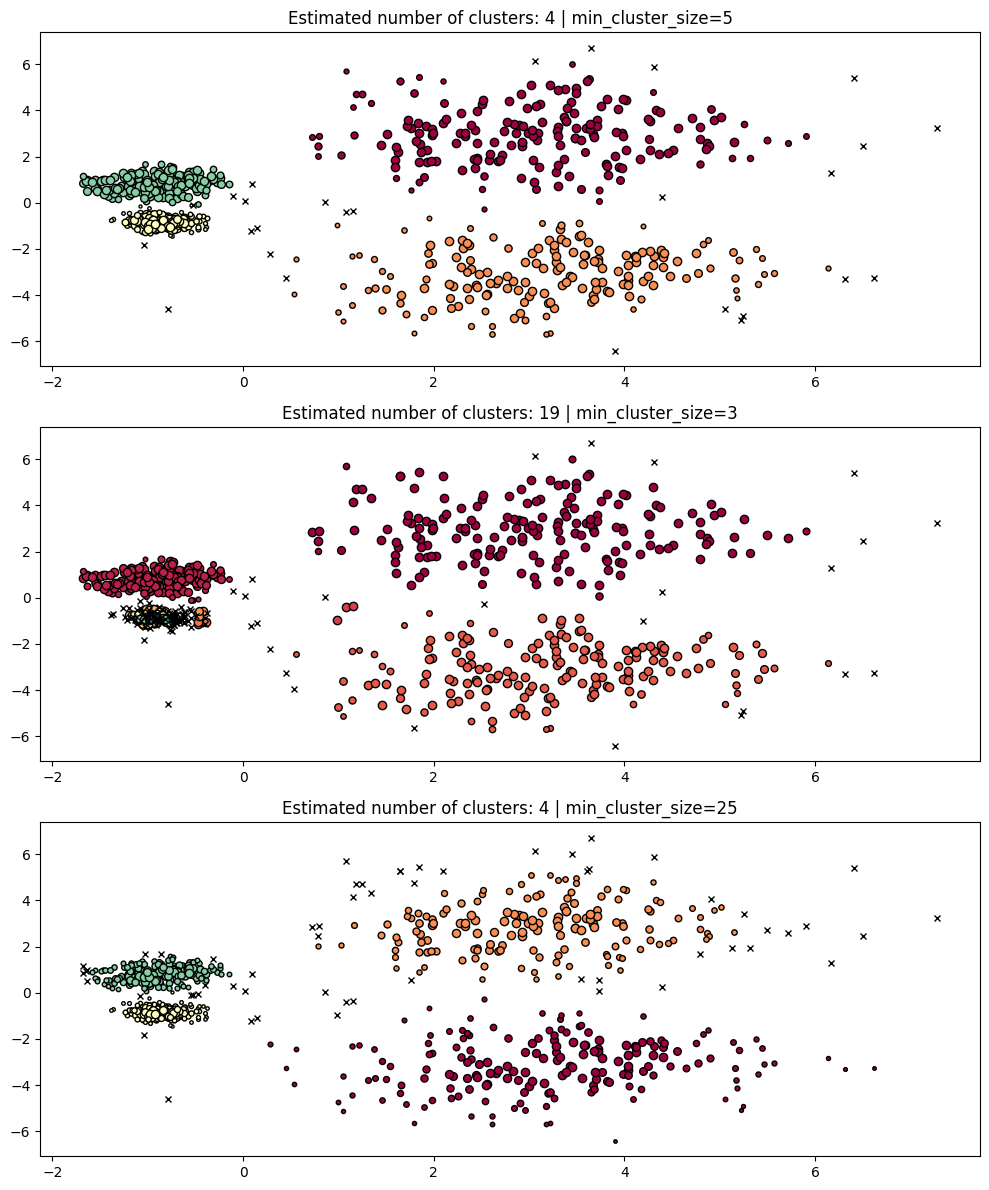

In [ ]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
  hdb = hdbscan.HDBSCAN(**param).fit(X)
  plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

### Langkah 8 - Eksperimen Hyperparameter min_samples

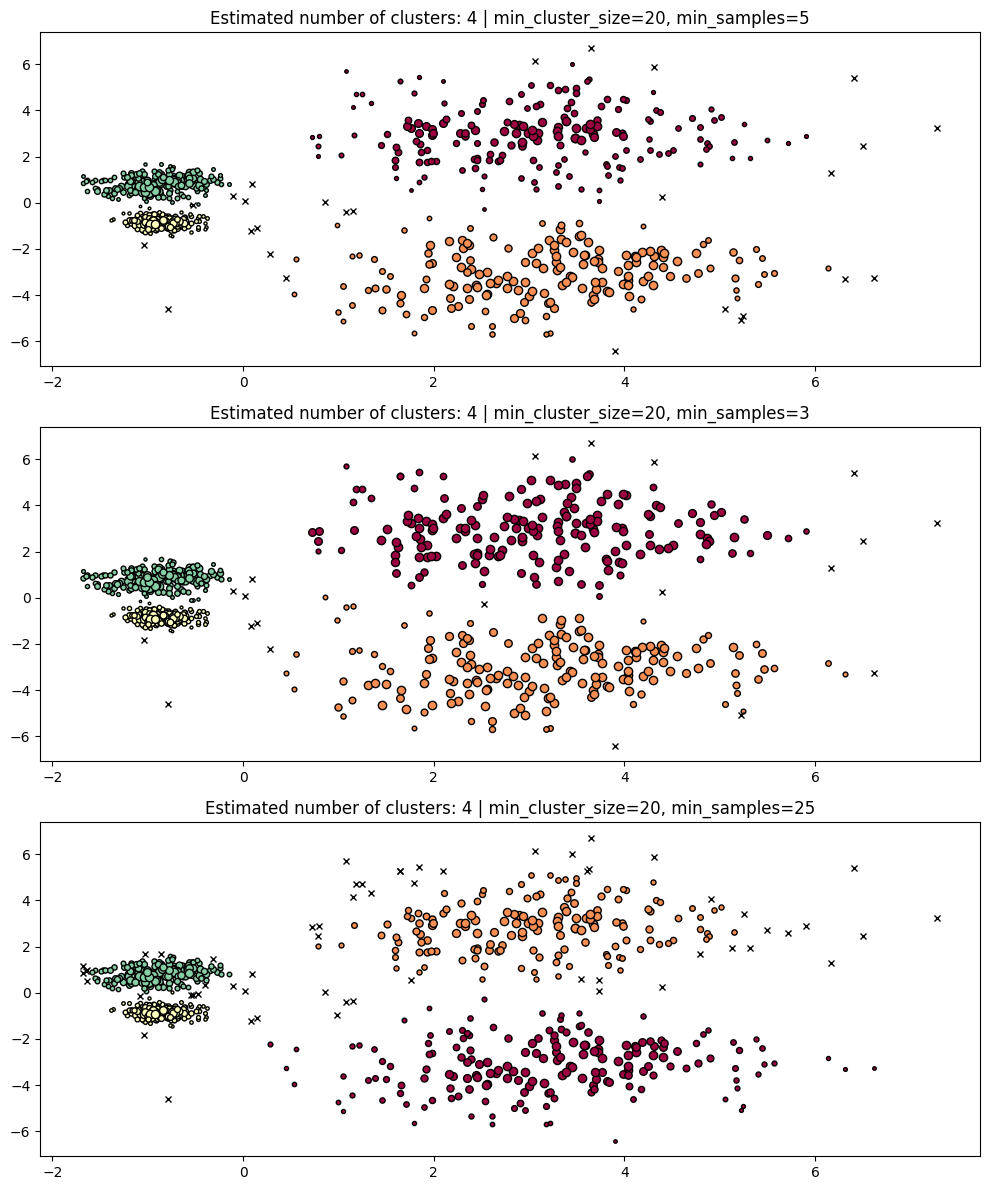

In [ ]:
# menentukan 3 kombinasi parameter untuk percobaan HDBSCAN
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)

# membuat subplot sebanyak 3 baris, 1 kolom dengan ukuran 10x12 inci
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# melakukan perulangan untuk setiap kombinasi parameter yang telah ditentukan
for i, param in enumerate(PARAM):
  # melatih model HDBSCAN dengan parameter tertentu menggunakan data X
  hdb = hdbscan.HDBSCAN(**param).fit(X)

  # menampilkan hasil clustering dan probabilitas tiap titik
  plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

 ### Langkah 9 - DBSCAN Clustering dari Pohon HDBSCAN

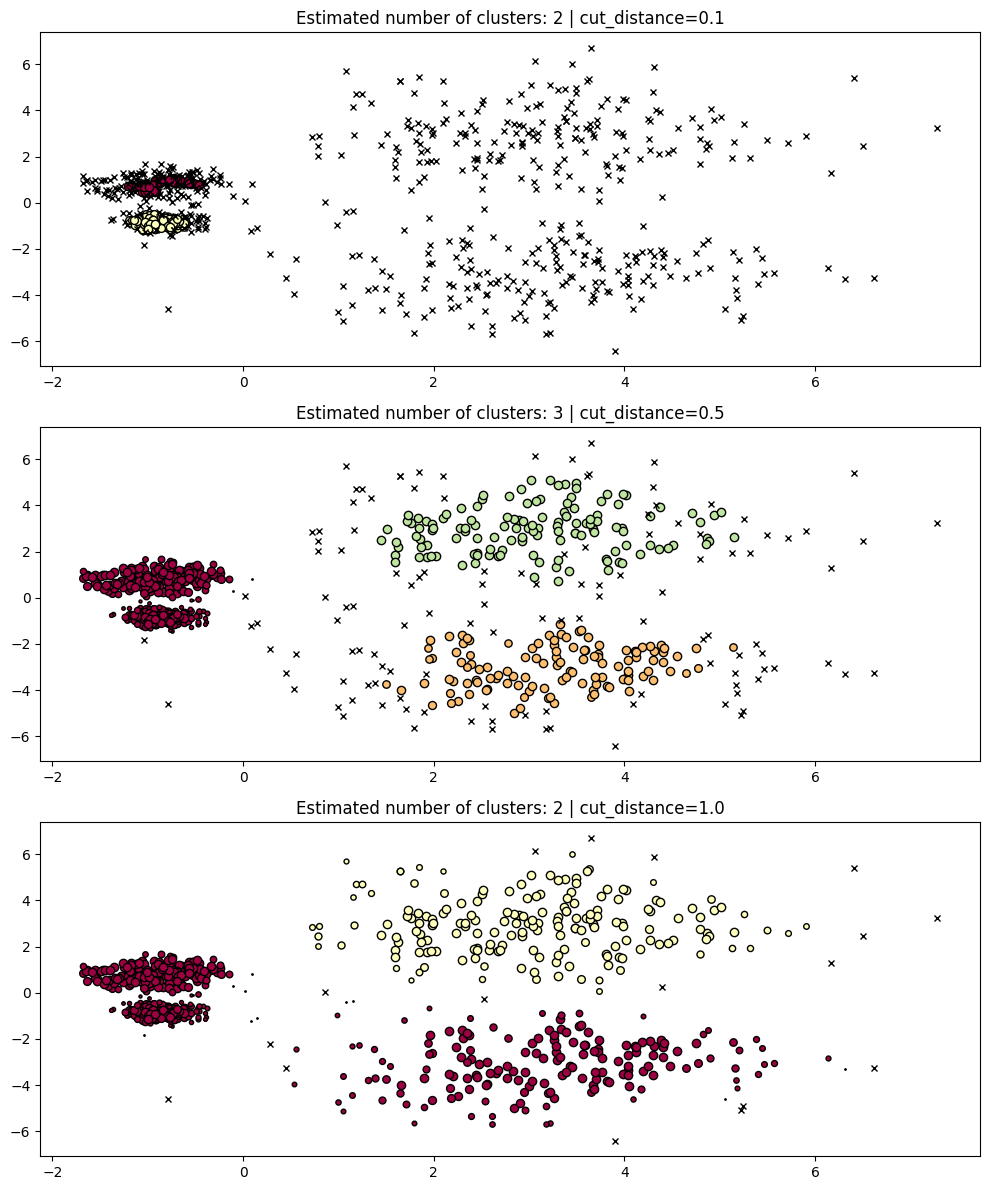

In [ ]:
# membuat 3 set parameter dengan nilai cut_distance yang berbeda untuk mengatur batas pemotongan cluster
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)

# melatih model HDBSCAN pada data X
hdb = hdbscan.HDBSCAN().fit(X)

# membuat 3 subplot vertikal dengan ukuran 10x12 inci
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))

# melakukan perulangan untuk tiap nilai cut_distance
for i, param in enumerate(PARAM):
  # menghasilkan label cluster dengan memotong hirarki pada jarak tertentu
  labels = hdb.dbscan_clustering(**param)

  # menampilkan hasil clustering dengan parameter cut_distance yang sesuai
  plot(X, labels, hdb.probabilities_, param, ax=axes[i])

### Langkah 10 - Evaluasi dengan Silhouette Score

In [ ]:
# mengimpor fungsi untuk menghitung Silhoutte Score dengan sklearn
from sklearn.metrics import silhouette_score

# menghitung silhoutte Score untuk hasil clustering HDBSCAN, semakin tinggi semakin baik dengan maks = 1
sil_score = silhouette_score(X, hdb.labels_)

# menampilkan nilai Silhoutte Score pada terminal
print(f"Silhoutte Score: {sil_score}")

Silhoutte Score: 0.5743816709862986


### Langkah 11 - Evaluasi dengan Davies-Bouldin Index

In [ ]:
# mengimpor fungsi untuk menghitung Davies - Bouldin dengan sklearn
from sklearn.metrics import davies_bouldin_score

# mengukur nilai davies_bouldin_score, semakin kecil semakin baik kualitas clustering
dbi_score = davies_bouldin_score(X, hdb.labels_)

# menampilkan nilai Davies - Bouldin pada terminal
print(f"Davies - Bouldin Index: {dbi_score}")

Davies - Bouldin Index: 1.6436030674842066


### Langkah 12 - Visualisasi Hasil Evaluasi

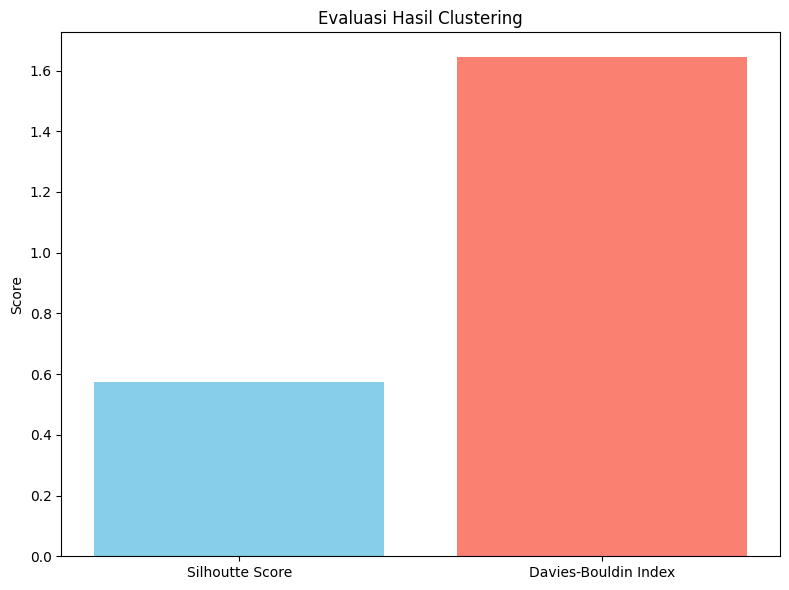

In [ ]:
# membuat dictionary 'scores' untuk menyimpan hasil 2 macam evaluasi clustering
scores = {
    "Silhoutte Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# membuat grafik batang (bar) untuk membandingkan diantara keduanya dengan ukuran 8x6 inci
fig, ax = plt.subplots(figsize=(8, 6))
# membuat 2 batang berbeda untuk metrik
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
# memberi judul pada grafik
ax.set_title("Evaluasi Hasil Clustering")
# memberi label pada sumbu Y
ax.set_ylabel("Score")
# menyesuaikan tata letak agar tidak terpotong
plt.tight_layout()
# menampilkan grafik
plt.show()

# TUGAS

### 1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset). **Saya memilih iris dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# mengimpor library pandas
import pandas as pd

# membaca file csv tentang iris
df = pd.read_csv('/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/TUGAS/Iris.csv')
# menampilkan 5 baris pertama
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Lakukan Clustering dengan HDBSCAN, K-Means, dan Klasterisasi Hierarki

Clustering dengan HDBSCAN

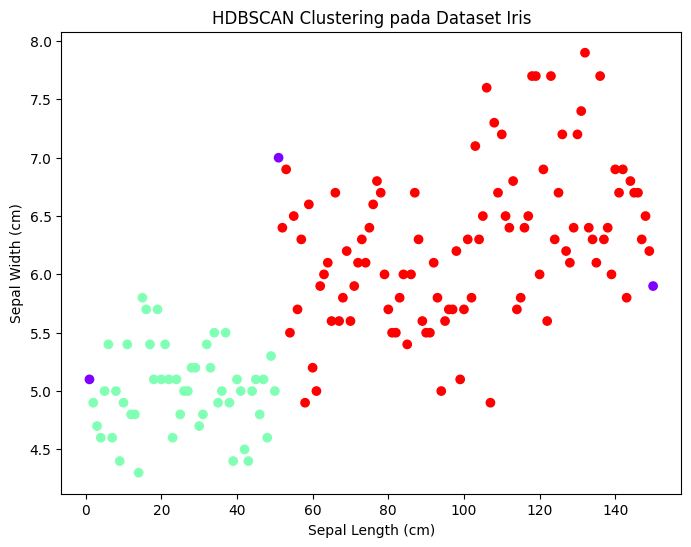

In [ ]:
import hdbscan
import matplotlib.pyplot as plt

# Mengambil fitur saja (tanpa kolom 'Species')
X = df.iloc[:, :-1].values

# Membuat dan melatih model HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=5)
labels_hdb = hdb.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_hdb, cmap='rainbow')
plt.title("HDBSCAN Clustering pada Dataset Iris")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Penjelasan singkat:
HDBSCAN membentuk cluster berdasarkan kepadatan data; hasilnya bisa memiliki cluster berbeda-beda jumlahnya dan sebagian titik bisa menjadi noise (-1).

Clustering dengan K-Means

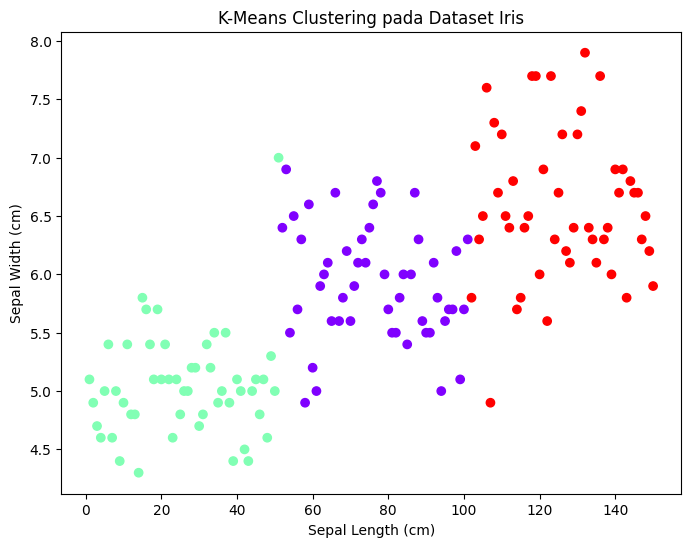

In [ ]:
from sklearn.cluster import KMeans

# Membuat model K-Means dengan 3 cluster (karena ada 3 jenis bunga Iris)
kmeans = KMeans(n_clusters=3, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')
plt.title("K-Means Clustering pada Dataset Iris")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Penjelasan singkat:
K-Means membagi data menjadi 3 cluster dengan jarak minimum ke centroid, cocok untuk data yang berbentuk bulat dan terpisah rapi.

Klasterisasi Hierarki (Agglomerative Clustering)

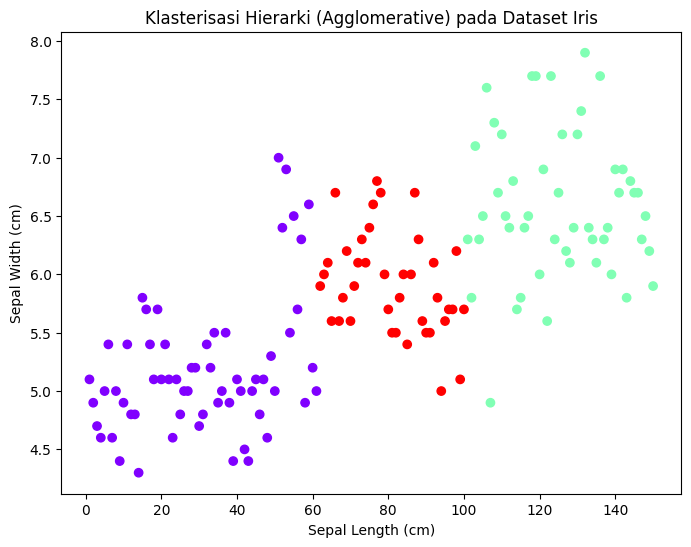

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Membuat model Agglomerative Clustering dengan 3 cluster
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_agglo, cmap='rainbow')
plt.title("Klasterisasi Hierarki (Agglomerative) pada Dataset Iris")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Penjelasan singkat:
Agglomerative Clustering mengelompokkan data dengan menggabungkan titik-titik terdekat secara bertahap hingga terbentuk jumlah cluster yang diinginkan.

### 3. Laporkan hasil:
### (a) Jumlah cluster yang terbentuk.
### (b) Banyaknya noise.

In [ ]:
# --- HDBSCAN CLUSTERING ---

import hdbscan
from sklearn.preprocessing import StandardScaler
import numpy as np

# Gunakan fitur numerik saja
X = df.drop(columns=['Id', 'Species'])

# Standarisasi data agar tidak bias karena skala berbeda
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi dan fit model HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=5)
hdb.fit(X_scaled)

# Simpan hasil cluster
df['cluster_hdbscan'] = hdb.labels_

# Hitung jumlah cluster dan noise
jumlah_cluster = len(np.unique(hdb.labels_[hdb.labels_ >= 0]))
banyak_noise = np.sum(hdb.labels_ == -1)

print("=== Hasil Clustering HDBSCAN ===")
print(f"Jumlah cluster terbentuk: {jumlah_cluster}")
print(f"Banyaknya noise: {banyak_noise}")

=== Hasil Clustering HDBSCAN ===
Jumlah cluster terbentuk: 2
Banyaknya noise: 2


In [ ]:
# --- K-MEANS CLUSTERING ---

from sklearn.cluster import KMeans

# Gunakan jumlah cluster = 3 (karena dataset Iris punya 3 spesies)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Simpan hasil cluster ke dataframe
df['cluster_kmeans'] = kmeans.labels_

# Hitung jumlah cluster
jumlah_cluster_kmeans = len(np.unique(kmeans.labels_))
banyak_noise_kmeans = 0  # K-Means tidak mengenal noise

print("=== Hasil Clustering K-Means ===")
print(f"Jumlah cluster terbentuk: {jumlah_cluster_kmeans}")
print(f"Banyaknya noise: {banyak_noise_kmeans}")

=== Hasil Clustering K-Means ===
Jumlah cluster terbentuk: 3
Banyaknya noise: 0


In [ ]:
# --- HIERARCHICAL CLUSTERING (Agglomerative) ---

from sklearn.cluster import AgglomerativeClustering

# Gunakan jumlah cluster = 3 (sesuai dengan Iris)
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X_scaled)

# Simpan hasil ke dataframe
df['cluster_hierarchical'] = hc_labels

# Hitung jumlah cluster
jumlah_cluster_hc = len(np.unique(hc_labels))
banyak_noise_hc = 0  # Tidak ada noise di Agglomerative Clustering

print("=== Hasil Klasterisasi Hierarki ===")
print(f"Jumlah cluster terbentuk: {jumlah_cluster_hc}")
print(f"Banyaknya noise: {banyak_noise_hc}")

=== Hasil Klasterisasi Hierarki ===
Jumlah cluster terbentuk: 3
Banyaknya noise: 0


### 4. Buat analisis singkat: apakah hasil clustering HDBSCAN, K-Means, Klasterisasi Hierarki (Agglomerative Clustering) sesuai dengan label asli dataset tersebut?

Analisis Hasil Clustering pada Dataset Iris
1. HDBSCAN

(a) HDBSCAN secara otomatis menentukan jumlah cluster berdasarkan density data.

(b) Biasanya, untuk dataset Iris, HDBSCAN menghasilkan 2–3 cluster utama dan beberapa titik dianggap noise (label = -1).

(c) Adanya noise menunjukkan bahwa HDBSCAN hanya mengelompokkan data yang jelas strukturnya, dan membuang data ambigu.

(d) Hasil ini sebagian besar sesuai dengan label asli (Species), terutama untuk kelas Iris setosa yang terpisah jelas, namun dua kelas lain (versicolor dan virginica) sering tumpang tindih.

Kesimpulan :
HDBSCAN cukup baik karena dapat mengenali cluster alami tanpa harus menentukan jumlah cluster terlebih dahulu, tetapi beberapa data mungkin terdeteksi sebagai noise.

--------------------------------------------

2. K-Means

(a) K-Means membagi data menjadi 3 cluster karena kita tetapkan n_clusters=3.

(b) Biasanya, K-Means dapat memisahkan Iris setosa dengan sangat baik (karena jaraknya jauh dari dua spesies lain).

(c) Namun, Iris versicolor dan Iris virginica sering tumpang tindih di ruang fitur, sehingga sebagian data dari dua kelas ini bisa tertukar.

Kesimpulan:
K-Means memberikan hasil cukup sesuai dengan label asli, tetapi karena asumsi bentuk cluster berbentuk bulat (spherical), kadang tidak akurat pada data dengan batas non-linear.

---------------------------------------------

3. Klasterisasi Hierarki (Agglomerative Clustering)

(a) Menggunakan pendekatan bottom-up, di mana setiap data awalnya cluster sendiri, lalu digabung berdasarkan jarak terdekat.

(b) Biasanya, hasilnya mirip dengan K-Means: Iris setosa terpisah jelas, sedangkan versicolor dan virginica agak bercampur.

(c) Dengan pemilihan jumlah cluster = 3, hasilnya umumnya sejalan dengan label sebenarnya.

Kesimpulan:
Hierarchical Clustering cukup baik untuk visualisasi struktur hubungan antar data (dendrogram), tetapi tidak selalu lebih akurat dari K-Means.